The most popular algorithm for network community detection is the Girvan-Newman algorithm. 
It is a top-down approach where we take the whole network and try to break it into two communities. 
This can be continued till the bottom.
Steps:
1. Define betweenness measure for each edge
2. Find the edge with maximum betweenness and remove it (The edge most in-between in the network connects up most number of pairs of nodes)
3. Recalculate and repeat

The example that we are using in this blog is the Zachary Karate club. It contains 34 members, and after an internal conflict, 
the club split into two. Our goal is to find if we can predict out how they split based on communities.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import networkx as nx
G=nx.karate_club_graph()
G

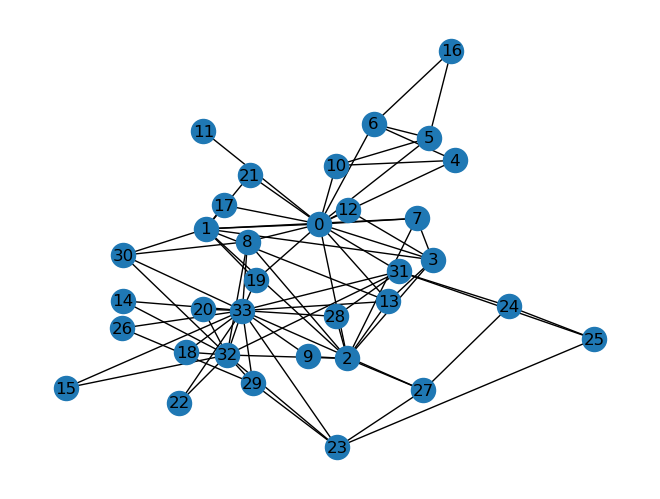

In [4]:
#To draw a graph using the Kamada-Kawai layout in NetworkX
nx.draw_kamada_kawai(G, with_labels=True)

In [5]:
btw_centrality= nx.algorithms.centrality.edge_betweenness_centrality(G)
btw_centrality

{(0, 1): 0.025252525252525245,
 (0, 2): 0.0777876807288572,
 (0, 3): 0.02049910873440285,
 (0, 4): 0.0522875816993464,
 (0, 5): 0.07813428401663694,
 (0, 6): 0.07813428401663695,
 (0, 7): 0.0228206434088787,
 (0, 8): 0.07423959482783014,
 (0, 10): 0.0522875816993464,
 (0, 11): 0.058823529411764705,
 (0, 12): 0.04652406417112298,
 (0, 13): 0.04237189825425121,
 (0, 17): 0.04012392835922248,
 (0, 19): 0.045936960642843,
 (0, 21): 0.040123928359222474,
 (0, 31): 0.1272599949070537,
 (1, 2): 0.023232323232323233,
 (1, 3): 0.0077243018419489,
 (1, 7): 0.007422969187675069,
 (1, 13): 0.01240556828792123,
 (1, 17): 0.01869960105254222,
 (1, 19): 0.014633732280791102,
 (1, 21): 0.01869960105254222,
 (1, 30): 0.032280791104320514,
 (2, 3): 0.022430184194890075,
 (2, 7): 0.025214328155504617,
 (2, 8): 0.009175791528732704,
 (2, 9): 0.030803836686189627,
 (2, 13): 0.007630931160342923,
 (2, 27): 0.04119203236850296,
 (2, 28): 0.02278244631185807,
 (2, 32): 0.06898678663384543,
 (3, 7): 0.00336558

In [6]:
def girwan_newman(G, no_of_components_to_split):
    while(no_of_components_to_split > nx.algorithms.components.number_connected_components(G)):
        # Calculate the betweenness centrality
        btw_centrality = nx.algorithms.centrality.edge_betweenness_centrality(G)
        # sort based on betweenness centrality
        #lambda item: item[1] defines an anonymous function (lambda function) that takes an argument item and returns item[1],
        #which refers to the second element of the item.
        sorted_edges = sorted(btw_centrality.items(), key = lambda item:item[1], reverse = True)[0]
        print('Removing the edge', sorted_edges)
        # remove edge which has highest centrality
        G.remove_edge(*sorted_edges[0])

    # Check if graph is split
    if(no_of_components_to_split <= nx.algorithms.components.number_connected_components(G)):
        # Plot the graph with both the nodes having different colors
        nx.draw_spring(G, with_labels=True)
        # return list of nodes in each community
        list_of_nodes = [c for c in sorted(nx.connected_components(G), key=len, reverse=True)]
        return list_of_nodes

Removing the edge ((0, 31), 0.1272599949070537)
Removing the edge ((0, 2), 0.11924273983097515)
Removing the edge ((0, 8), 0.13782067605597018)
Removing the edge ((13, 33), 0.14617273782105492)
Removing the edge ((19, 33), 0.21966651886437982)
Removing the edge ((2, 32), 0.1786195286195287)
Removing the edge ((1, 30), 0.25601957954899124)
Removing the edge ((1, 2), 0.1947415329768271)
Removing the edge ((2, 3), 0.19191919191919182)
Removing the edge ((2, 7), 0.25445632798573975)
Removing the edge ((2, 13), 0.5080213903743315)


[{2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33},
 {0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}]

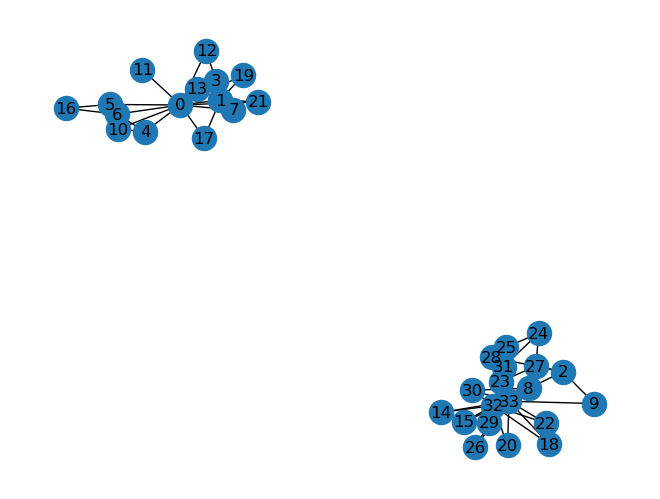

In [7]:
G=nx.karate_club_graph()
communities=girwan_newman(G,2)
communities

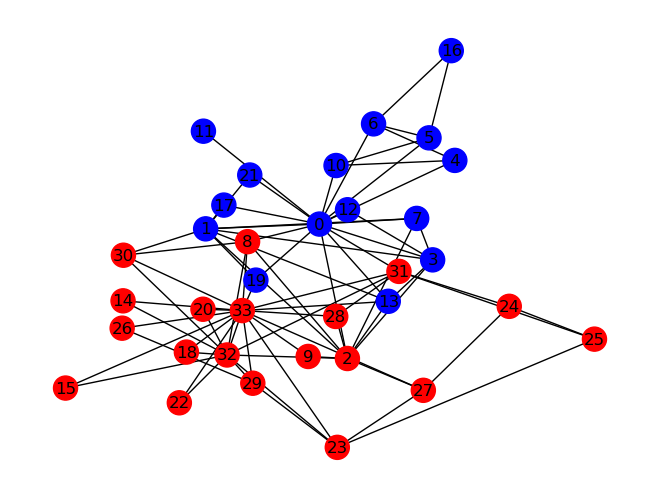

In [8]:
# Reinstanciste G if necessary
G = nx.karate_club_graph()

# Colors for edges
colors_for_edges = 'rbgoy'
pos = nx.spring_layout(G)
for i, nodes in enumerate(communities):
    for node in nodes:
        G.add_node(node,node_color = colors_for_edges[i])   
nx.draw_kamada_kawai(G, with_labels=True, node_color = list(nx.get_node_attributes(G,'node_color').values()))

NetworkX has an inbuilt function to calculate the same split.

In [9]:
karate_club_split= nx.algorithms.community.centrality.girvan_newman(G)
karate_club_split_tuple= tuple(sorted(c) for c in next(karate_club_split))
karate_club_split_tuple

([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21],
 [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])